In [4]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import struct
import sys
import glob
import datetime
import pytz

In [5]:
# Replace 'your_file_path.mat' with the path to your .mat file
file_path = '../../Data/joesdata.mat'

# Load the .mat file
DATA = loadmat(file_path)['DATA']
print(DATA.shape)
DATA = DATA.T

(1000000, 4)


## Show all channels

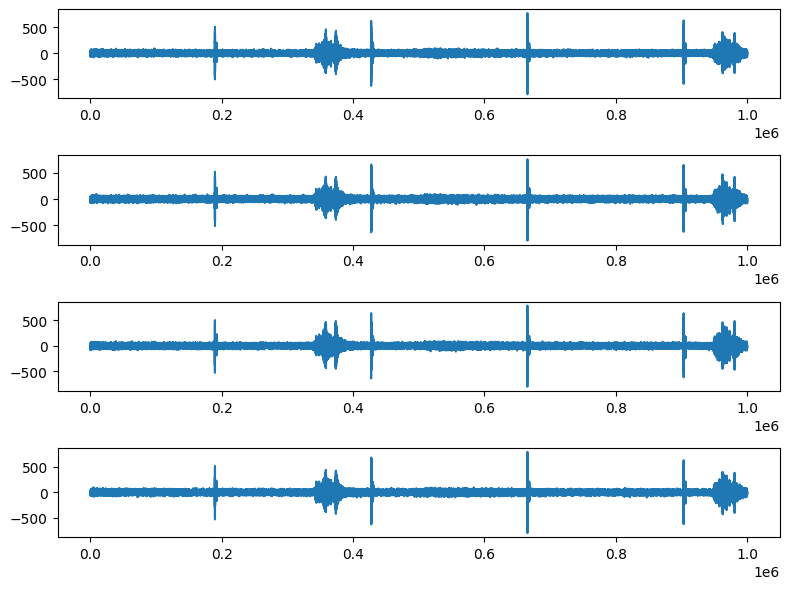

In [6]:
num_rows = DATA.shape[0]
fig, axs = plt.subplots(num_rows, 1,figsize=(8,6))  # Adjust figsize as needed
for i in range(num_rows):
    axs[i].plot(DATA[i])

    plt.tight_layout()
plt.show()

## Load in segmented pulses

2023-11-05 01:01:01+00:00
2023-11-05 01:01:10.624920+00:00
[ 22.  24.  24.  -7. -38. -66. -74. -41.  -2.  38.]
[ 22  24  24  -7 -38 -66 -74 -41  -2  38]
1991 1991
2023-11-05 01:01:10.673110+00:00
[ 61.  -8. -58. -58.   1.  63.  94.  83.  30. -40.]
[ 61  -8 -58 -58   1  63  94  83  30 -40]
455 455
2023-11-05 01:01:04.584680+00:00
[  74.    3.  -69. -103.  -91.  -46.   33.   76.   78.   33.]
[  74    3  -69 -103  -91  -46   33   76   78   33]
1797 1797
2023-11-05 01:01:10.509170+00:00
[-47.   5.  65.  90.  70.   0. -45. -75. -67.   8.]
[-47   5  65  90  70   0 -45 -75 -67   8]
553 553
2023-11-05 01:01:02.896570+00:00
[-19. -15. -11.  -3.  13.   6.   7. -10.  -4. -21.]
[-19 -15 -11  -3  13   6   7 -10  -4 -21]
824 824
2023-11-05 01:01:10.527070+00:00
[ -37.  -99. -109.  -70.    9.   80.   91.   41.  -29.  -97.]
[ -37  -99 -109  -70    9   80   91   41  -29  -97]
288 288
2023-11-05 01:01:04.763100+00:00
[ -5. -34. -48. -32. -30. -26.  -2.  -1.  -7. -22.]
[ -5 -34 -48 -32 -30 -26  -2  -1  -

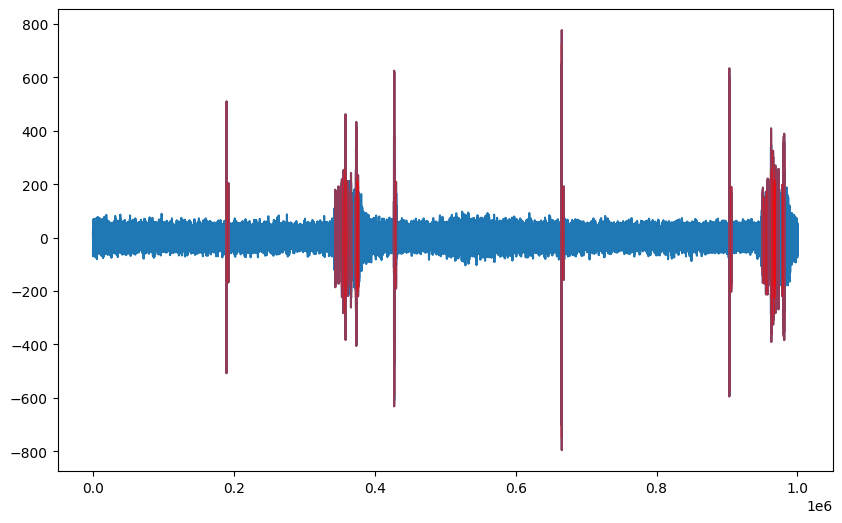

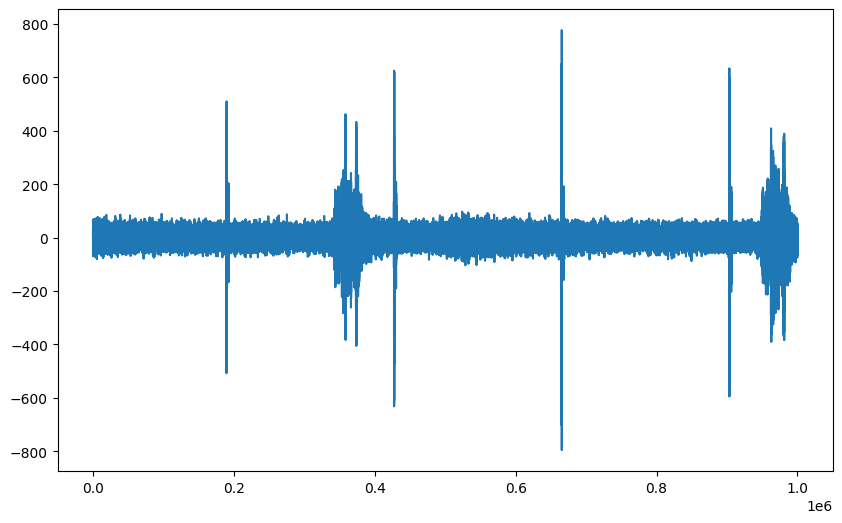

In [7]:


startTime = datetime.datetime(2000+23, 11, 5, 1, 1, 1, tzinfo=datetime.timezone.utc)
startTime = startTime.replace(tzinfo=pytz.UTC)

print(startTime)
segmentFiles = glob.glob("../Segmented_pulses/*.npz")
#for file in segmentFiles:
#    print(file)

format_str = "%Y-%m-%d %H:%M:%S.%f"

fig, axs = plt.subplots(1, 1,figsize=(10,6))  # Adjust figsize as needed
plt.plot(DATA[0])
for file in segmentFiles:
    #print(file)
    data = np.load(file)
    segment = data['regionData']  # Replace 'arr_0' with the key of the first array
    time = data['clickTime']
    #print(time[0])
    
    clickTime_datetime = datetime.datetime.strptime(str(time), format_str)
    clickTime_datetime = clickTime_datetime.replace(tzinfo=pytz.UTC)

    
    print(clickTime_datetime)
    # Calculate the difference
    diff = clickTime_datetime - startTime

    # Convert the difference to microseconds
    microseconds_diff = diff.microseconds + (diff.seconds + diff.days * 24 * 3600) * 10**6
    
    #print(time, microseconds_diff)
    
    #print(segment)
    peak_amp_ind = np.argmax(segment)
    
    peak_samp_ind = microseconds_diff / 10
    
    startPoint = peak_samp_ind -  peak_amp_ind
    endPoint = peak_samp_ind -  peak_amp_ind + len(segment)
    
    print(segment[:10])
    print(DATA[0][int(startPoint):int(startPoint+10)])
    
    xs = np.arange(startPoint,endPoint ,1)
    print(len(xs),len(segment))
    plt.plot(xs,segment,c="red", alpha = 0.5)
plt.savefig('detection.jpeg')
plt.show()


fig, axs = plt.subplots(1, 1,figsize=(10,6))  # Adjust figsize as needed
plt.plot(DATA[0])
plt.savefig('truevals.jpeg')
plt.show()


## Plot segments only

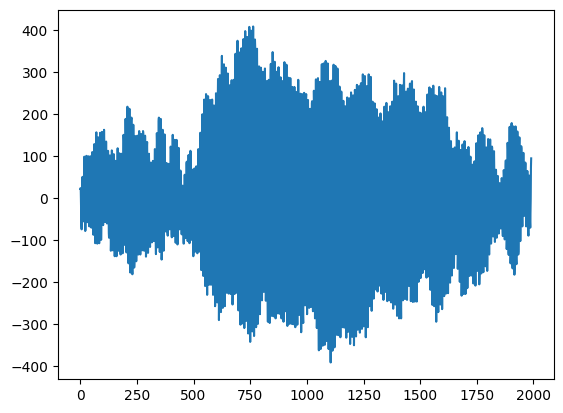

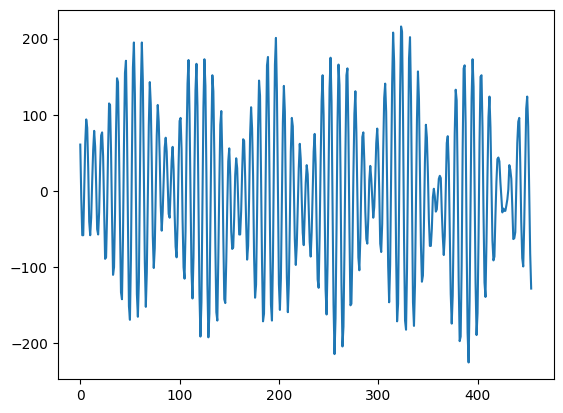

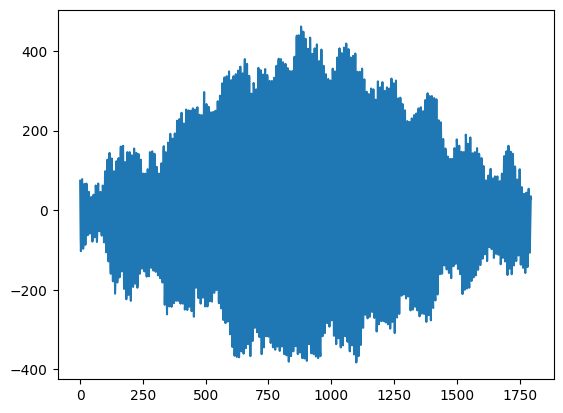

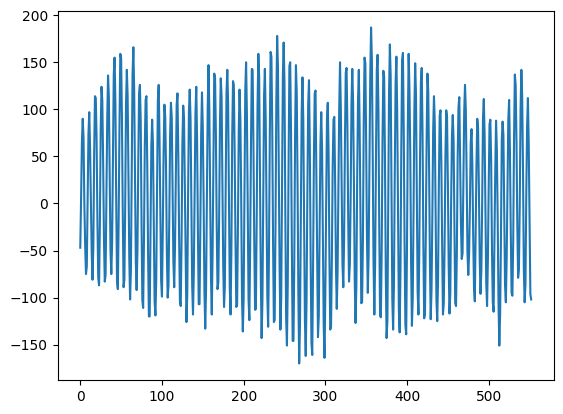

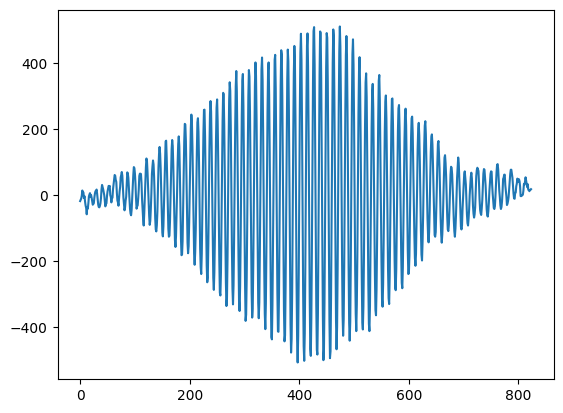

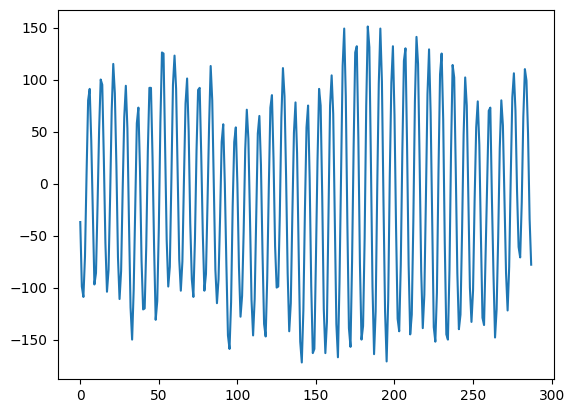

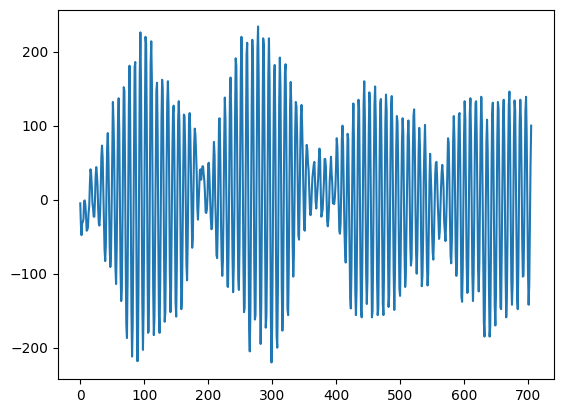

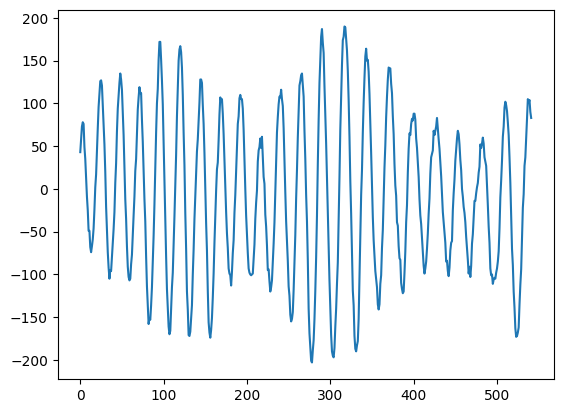

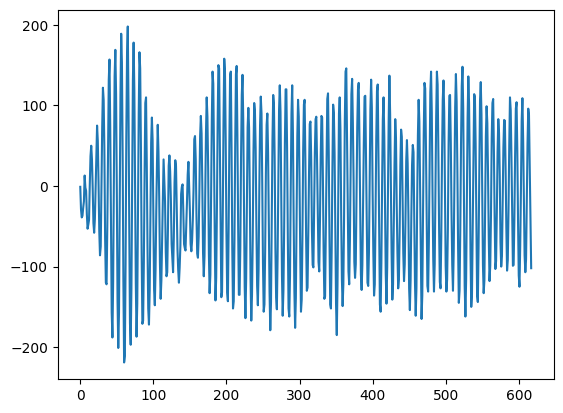

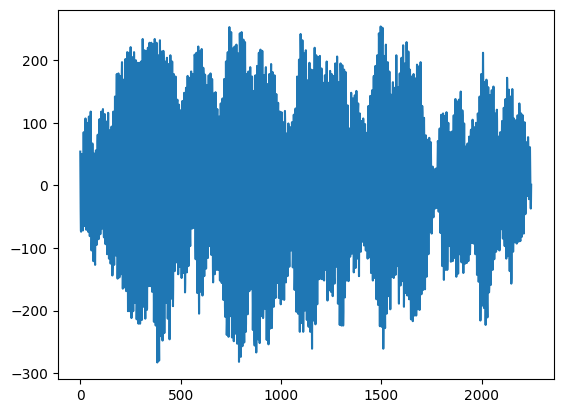

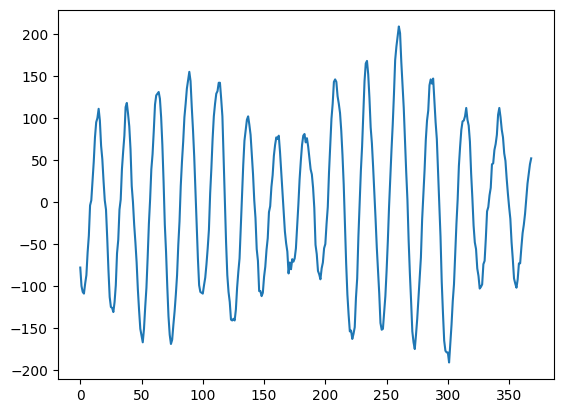

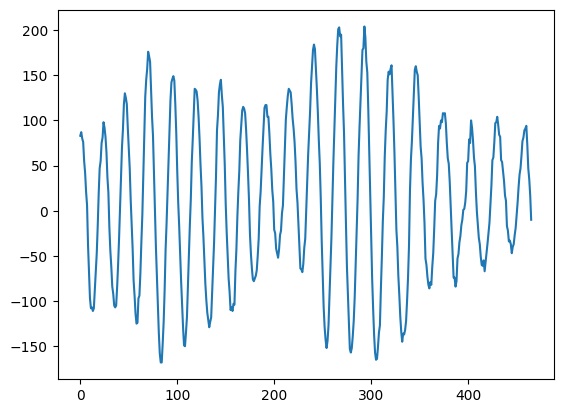

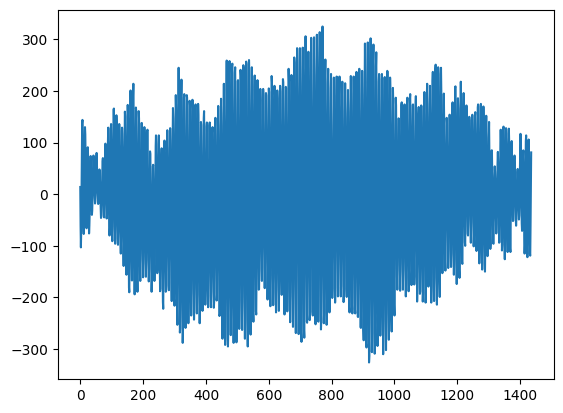

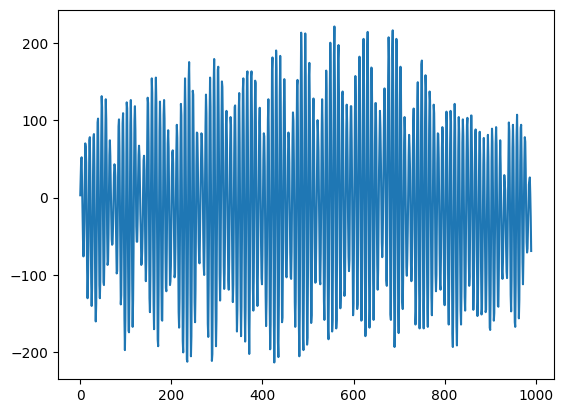

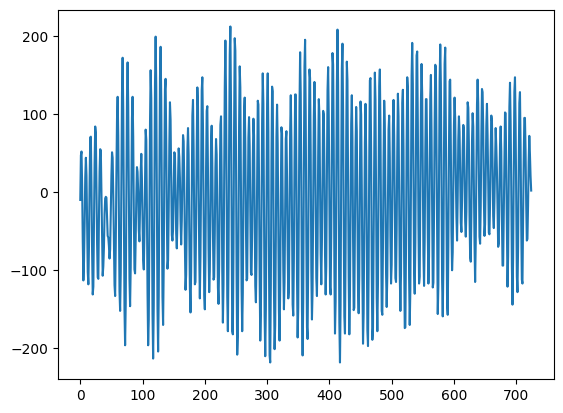

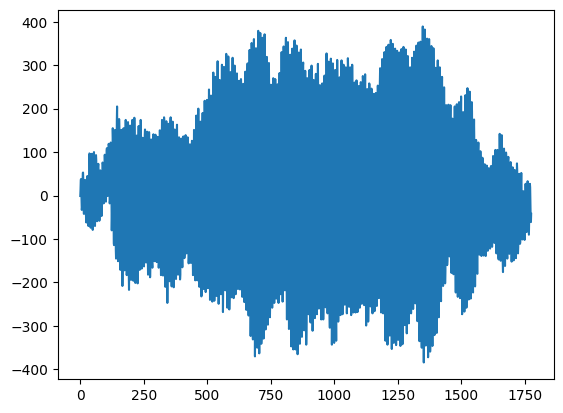

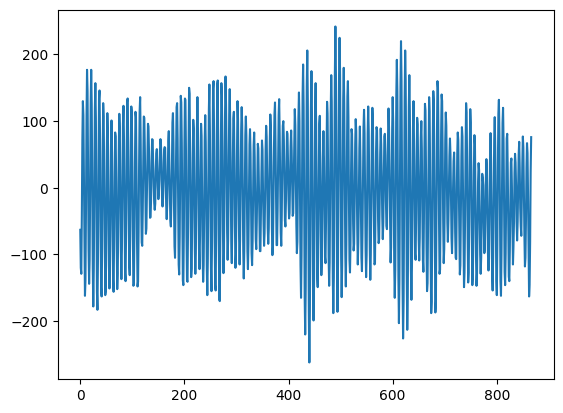

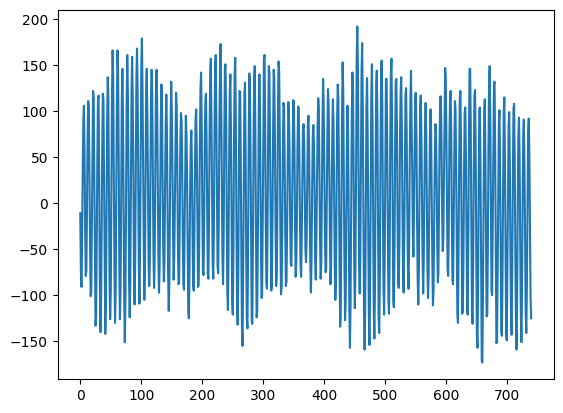

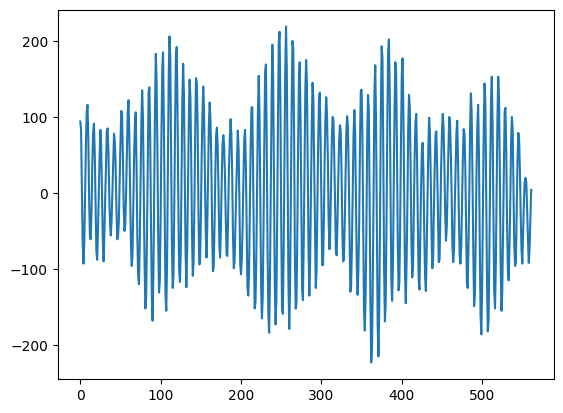

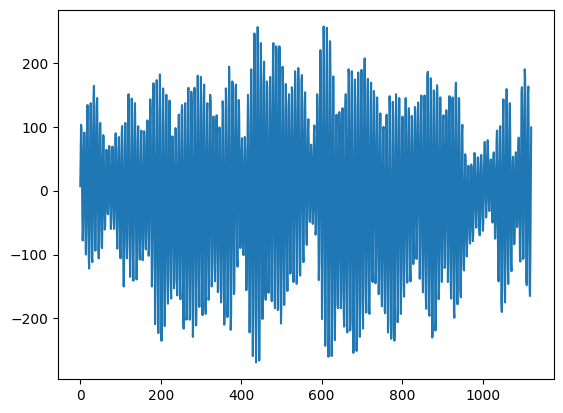

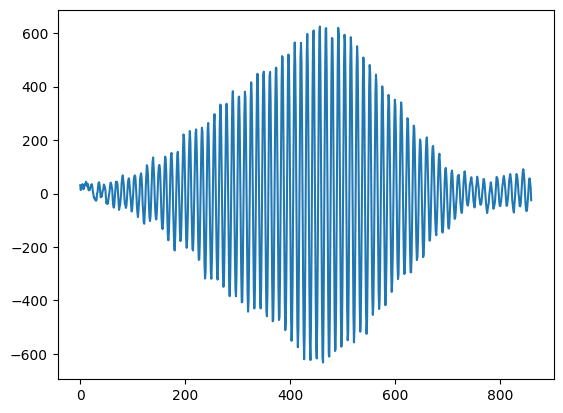

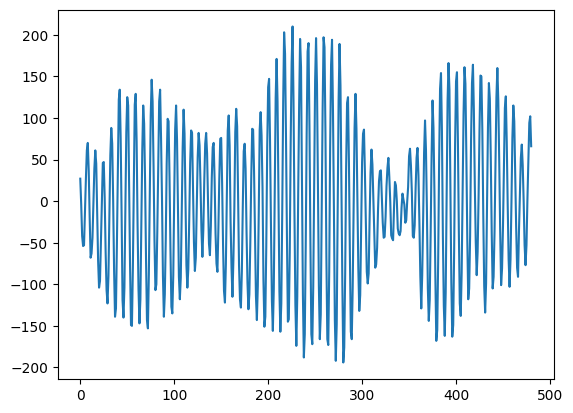

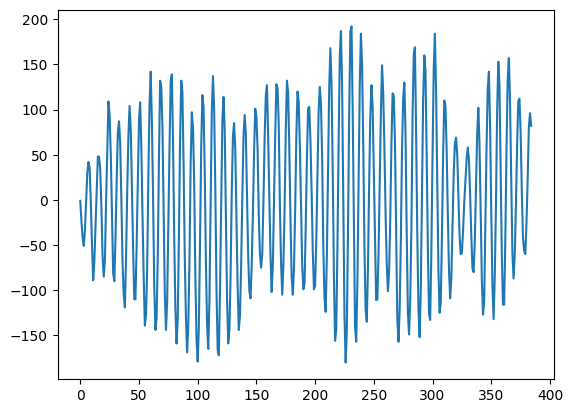

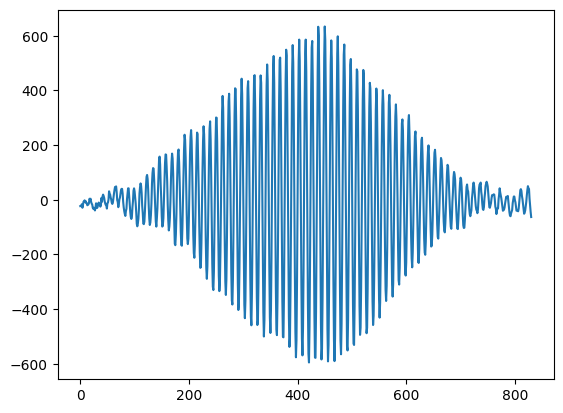

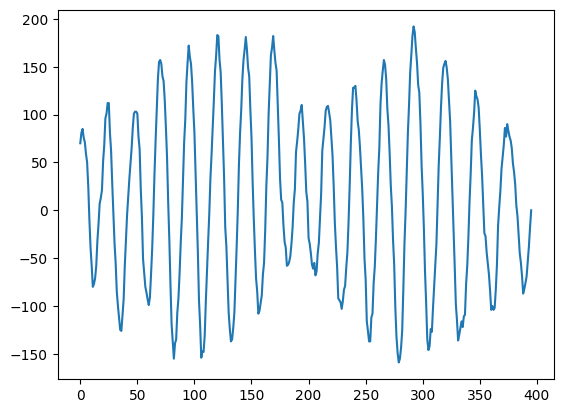

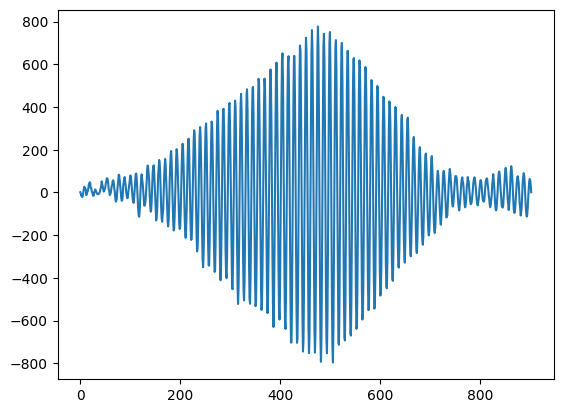

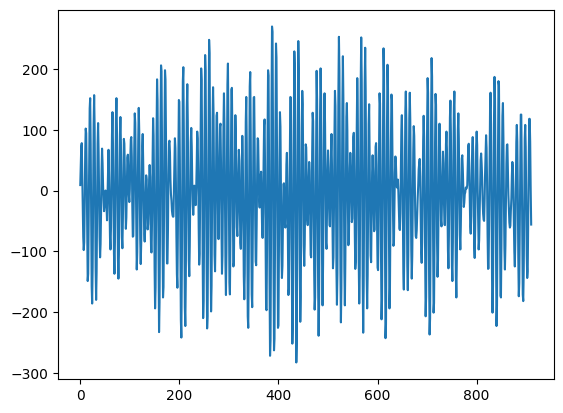

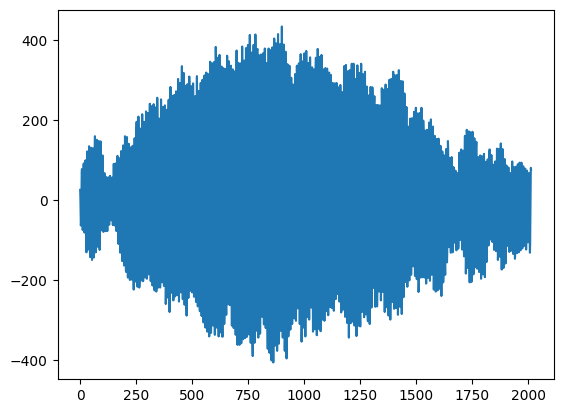

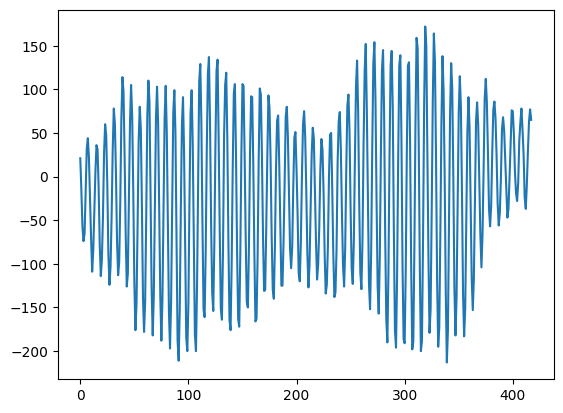

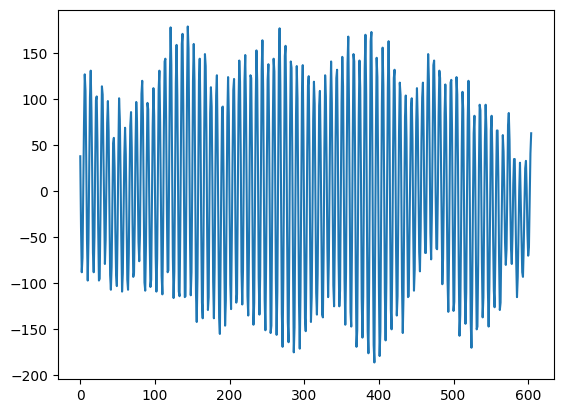

In [8]:
for file in segmentFiles:
    data = np.load(file)
    segment = data['regionData']  # Replace 'arr_0' with the key of the first array
    time = data['clickTime']
    plt.plot(np.arange(0,len(segment),1), segment)
    plt.show()